In [18]:
# load the data
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
training_set_path = '/Users/liujingmao/Downloads/MRS8230417/MRS821ARM/artificial_intelligence/Chapter8/dataset/training_set'
training_set = train_datagen.flow_from_directory(training_set_path,
                    target_size=(50,50),
                   batch_size=32,class_mode='binary')

Found 8000 images belonging to 2 classes.


In [19]:
# set up the cnn mode
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense
# 创建模型
model = Sequential()
# 添加卷积层
model.add(Conv2D(32,(3,3),input_shape=(50,50,3),activation='relu'))
# 添加池化层
model.add(MaxPool2D(pool_size=(2,2)))
# 添加卷积层
model.add(Conv2D(32,(3,3),activation='relu'))
# 添加池化层
model.add(MaxPool2D(pool_size=(2,2)))
# 添加 flattening layer
model.add(Flatten())
# FC layer
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [20]:
# config the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               495744    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [22]:
# train the model
model.fit_generator(training_set,epochs=25)

Epoch 1/25
250/250 [==============================] - 25s 97ms/step - loss: 0.6880 - accuracy: 0.5725
Epoch 2/25
250/250 [==============================] - 19s 76ms/step - loss: 0.5730 - accuracy: 0.6957
Epoch 3/25
250/250 [==============================] - 18s 72ms/step - loss: 0.5312 - accuracy: 0.7371
Epoch 4/25
250/250 [==============================] - 18s 72ms/step - loss: 0.4749 - accuracy: 0.7718
Epoch 5/25
250/250 [==============================] - 18s 73ms/step - loss: 0.4351 - accuracy: 0.7986
Epoch 6/25
250/250 [==============================] - 18s 72ms/step - loss: 0.3784 - accuracy: 0.8318
Epoch 7/25
250/250 [==============================] - 18s 73ms/step - loss: 0.3392 - accuracy: 0.8521
Epoch 8/25
250/250 [==============================] - 18s 73ms/step - loss: 0.2902 - accuracy: 0.8804
Epoch 9/25
250/250 [==============================] - 18s 73ms/step - loss: 0.2201 - accuracy: 0.9080
Epoch 10/25
250/250 [==============================] - 18s 73ms/step - loss: 0.170

In [23]:
# accuracy on the training data
accuracy_train = model.evaluate_generator(training_set)
print(accuracy_train)

[0.0003098463639616966, 1.0]


In [24]:
test_set_path = '/Users/liujingmao/Downloads/MRS8230417/MRS821ARM/artificial_intelligence/Chapter8/dataset/test_set'
test_set = train_datagen.flow_from_directory(test_set_path,
                                             target_size=(50,50),
                                             batch_size=32,
                                             class_mode='binary')

accuracy_test = model.evaluate_generator(test_set)
print(accuracy_test)

Found 2000 images belonging to 2 classes.
[1.6503028869628906, 0.7494999766349792]


In [25]:
# load single image 
from keras.preprocessing.image import load_img,img_to_array
pic_dog = 'cat2.jpg'
pic_dog = load_img(pic_dog,target_size=(50,50))
pic_dog = img_to_array(pic_dog)
pic_dog = pic_dog/255
pic_dog = pic_dog.reshape(1,50,50,3)
result = model.predict_classes(pic_dog)
print(result)

[[0]]


In [11]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [12]:
test_set.class_indices

{'cats': 0, 'dogs': 1}

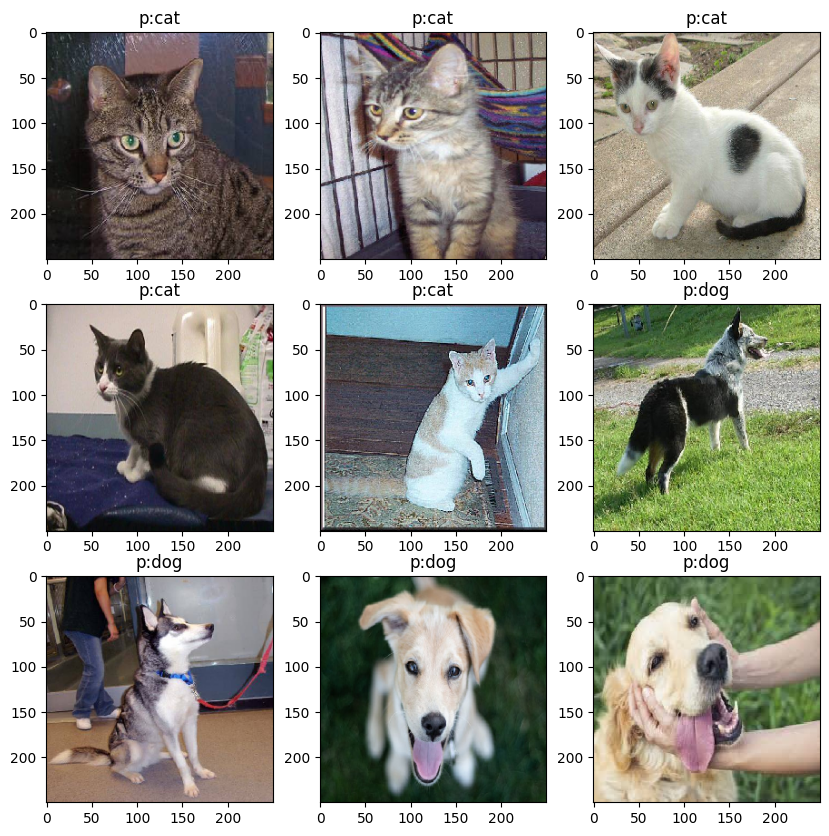

In [26]:
# make prediction on multiple images
import matplotlib as mlp
font2 = {'family' : 'SimHei',
'weight' : 'normal',
'size'   : 20,
}
mlp.rcParams['font.family'] = 'SimHei'
mlp.rcParams['axes.unicode_minus'] = False
from matplotlib import pyplot as plt
from matplotlib.image import imread
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
a = [i for i in range(1,10)]
fig = plt.figure(figsize=(10,10))
for i in a:
    img_name = str(i)+'.jpg'
    img_ori = load_img(img_name, target_size=(50, 50))
    img = img_to_array(img_ori)
    img = img.astype('float32')/255
    img = img.reshape(1,50,50,3)
    result = model.predict_classes(img)
    img_ori = load_img(img_name, target_size=(250, 250))
    plt.subplot(3,3,i)
    plt.imshow(img_ori)
    plt.title('p:dog' if result[0][0] == 1 else 'p:cat')
plt.show()

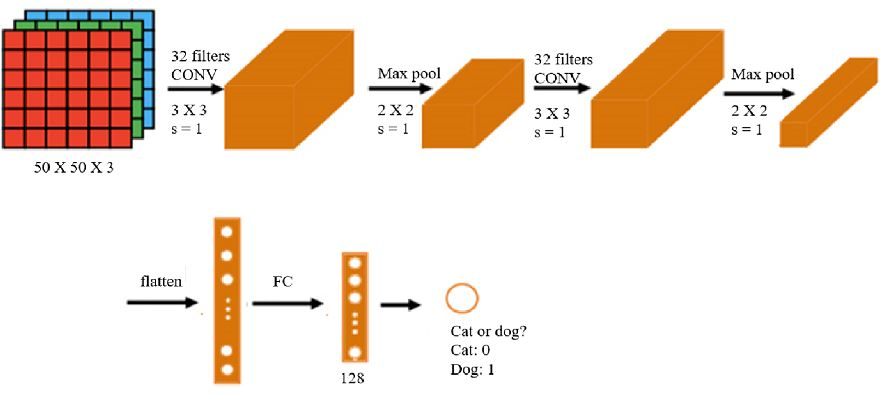

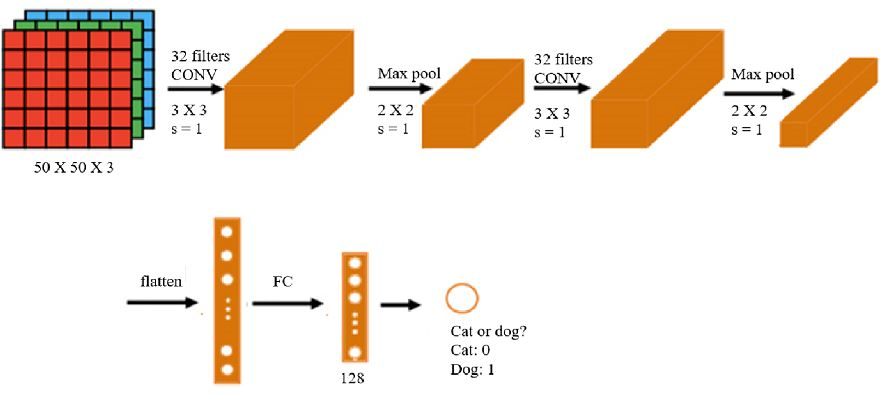